# ANAMOLY DETECTION – FRAUD IDENTIFICATION
## What is Insurance fraud ?
Insurance fraud refers to any intentional act committed to deceive or mislead an insurance company during the application or claims process,

## About this project :-

- The objective of the analysis is to identify if the claim is fraudulent or not?
- Dataset consists of several Variables(Independent) and one Outcome Variable(Dependent)
- The outcome variable value is either 'Y' or 'N' indicating whether the claim is fraudulent or not?





# 1. Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FInal Project/insurance_claims.csv')
df.head().T.style.set_properties(**{'background-color': 'grey',
                                            'color': 'white',
                                            'border-color': 'white'})

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.910000,1197.220000,1413.140000,1415.740000,1583.910000
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [ ]:
print(df.dtypes)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
print(df.describe())

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

Data Cleaning & Pre-processing:

In [ ]:
# Check for missing values
print(df.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
# Check for "?" values
question_mark_values = (df == "?").sum()
print("\n\"?\" values:\n", question_mark_values)


"?" values:
 months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily

In [ ]:
authorities_contacted_unique = df['authorities_contacted'].unique()
collision_type_unique = df['collision_type'].unique()
property_damage_unique = df['property_damage'].unique()
police_report_available_unique = df['police_report_available'].unique()

print("Unique values in 'authorities_contacted' column:", authorities_contacted_unique)
print("Unique values in 'collision_type' column:", collision_type_unique)
print("Unique values in 'property_damage' column:", property_damage_unique)
print("Unique values in 'police_report_available' column:", police_report_available_unique)

Unique values in 'authorities_contacted' column: ['Police' nan 'Fire' 'Other' 'Ambulance']
Unique values in 'collision_type' column: ['Side Collision' '?' 'Rear Collision' 'Front Collision']
Unique values in 'property_damage' column: ['YES' '?' 'NO']
Unique values in 'police_report_available' column: ['YES' '?' 'NO']


In [ ]:
# Replace missing values in the authorities_contacted column with "Other"
df['authorities_contacted'].fillna('Other', inplace=True)

# Replace "?" values in the collision_type column with "Other" if incident_severity is "Trivial Damage" or "Minor Damage"
df.loc[(df['collision_type'] == '?') & (df['incident_severity'].isin(['Trivial Damage', 'Minor Damage'])), 'collision_type'] = 'Other'

# Replace "?" values in the police_report_available column with "YES" if authorities_contacted is "Police", "Ambulance", or "Fire", otherwise replace with "NO"
df.loc[(df['police_report_available'] == '?') & (df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'YES'
df.loc[(df['police_report_available'] == '?') & ~(df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'NO'

# Replace "?" values in the property_damage column with "YES" if property_claim exists, otherwise replace with "NO"
df.loc[(df['property_damage'] == '?') & (df['property_claim'] > 0), 'property_damage'] = 'YES'
df.loc[(df['property_damage'] == '?') & (df['property_claim'] == 0), 'property_damage'] = 'NO'

In [ ]:
df = df.drop('_c39', axis=1)


In [ ]:
# Check for NaN values
nan_values = df.isna().sum()
print("NaN values:\n", nan_values)

# Check for "?" values
question_mark_values = (df == "?").sum()
print("\n\"?\" values:\n", question_mark_values)

NaN values:
 months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                     

In [ ]:
# Calculate the IQR for 'umbrella_limit'
Q1 = df['umbrella_limit'].quantile(0.25)
Q3 = df['umbrella_limit'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['umbrella_limit'] < lower_bound) | (df['umbrella_limit'] > upper_bound)]

df['umbrella_limit'] = np.where(df['umbrella_limit'] < lower_bound, lower_bound, df['umbrella_limit'])
df['umbrella_limit'] = np.where(df['umbrella_limit'] > upper_bound, upper_bound, df['umbrella_limit'])




In [ ]:
from sklearn.preprocessing import RobustScaler

# Select numerical features for normalization
numerical_features = ['umbrella_limit', 'capital-gains', 'capital-loss',
                      'incident_hour_of_the_day', 'number_of_vehicles_involved',
                      'bodily_injuries', 'witnesses', 'total_claim_amount',
                      'injury_claim', 'property_claim', 'vehicle_claim']

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# 3. Exploratory Data Analysis


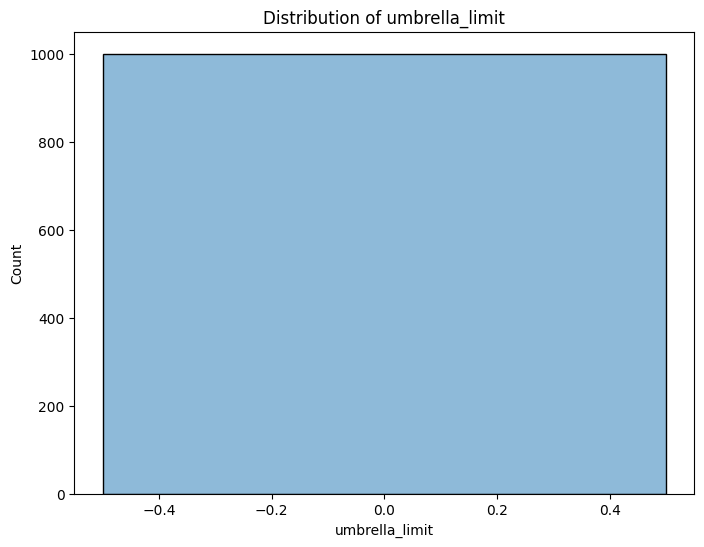

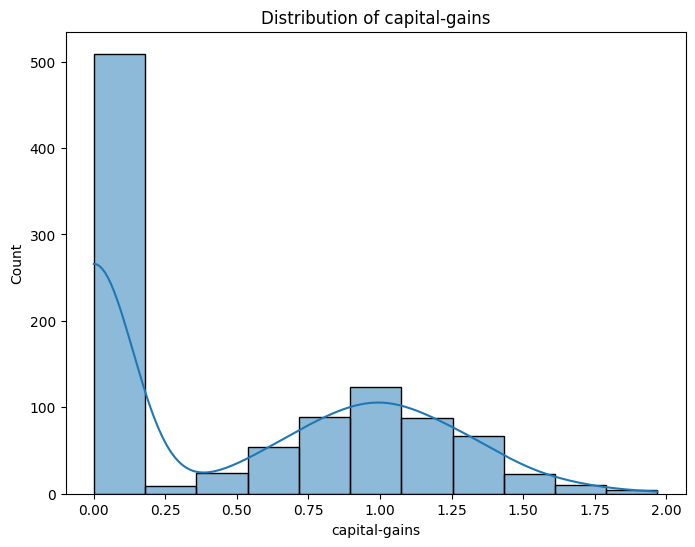

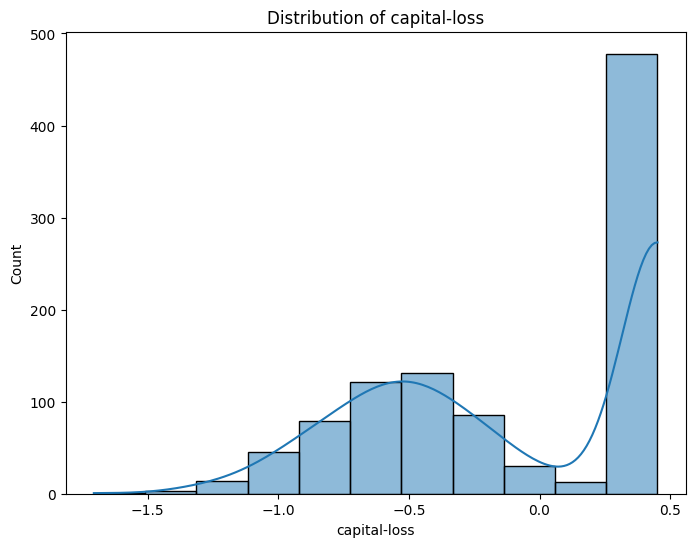

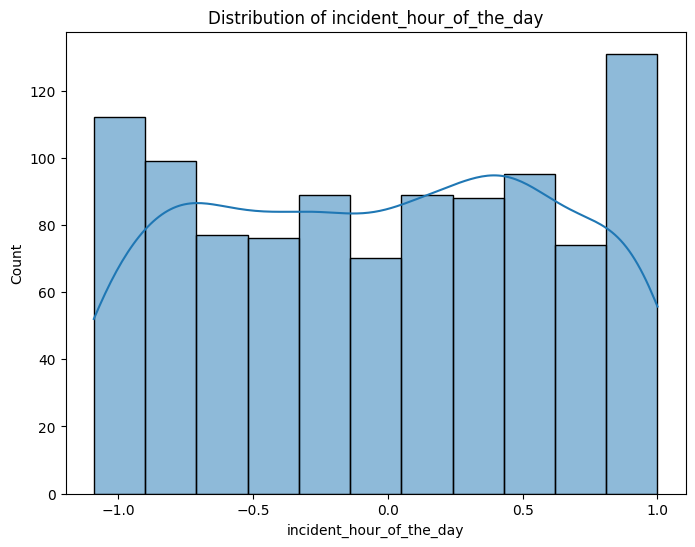

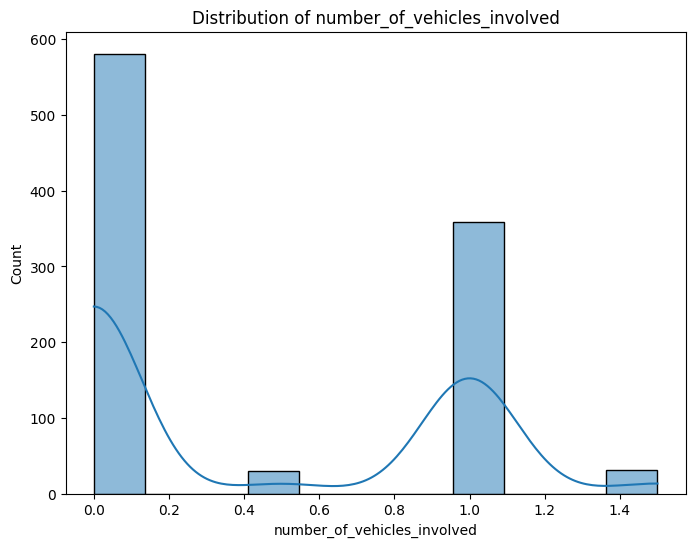

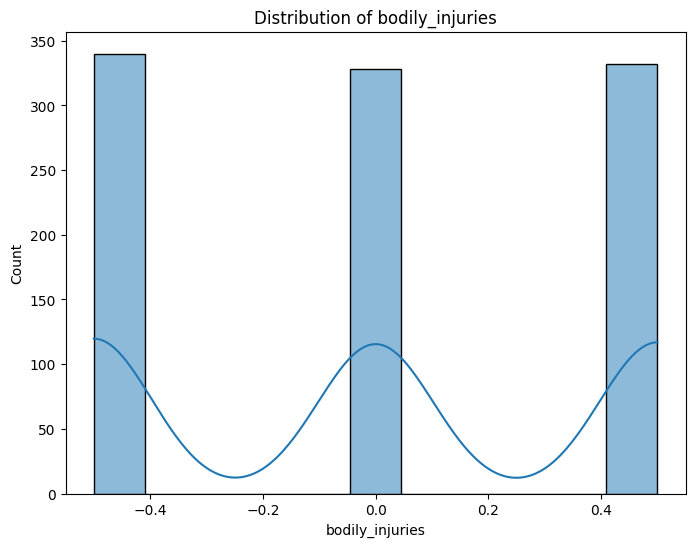

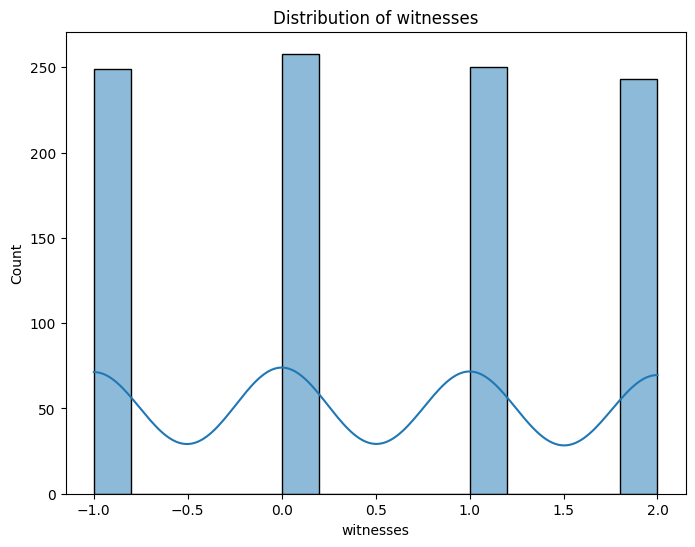

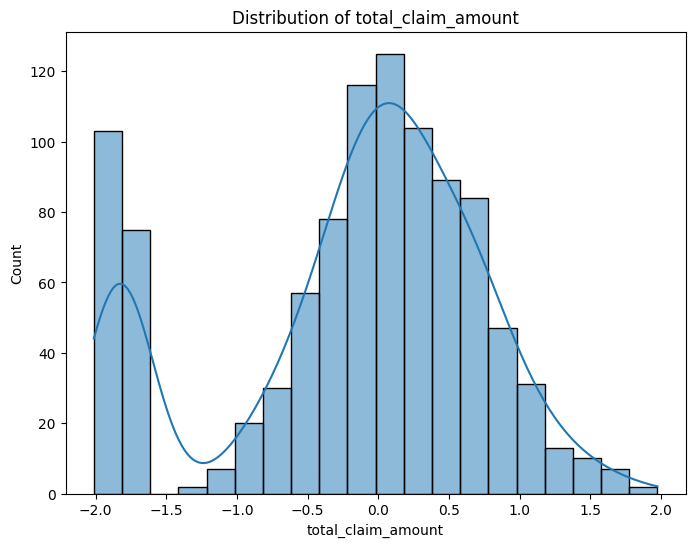

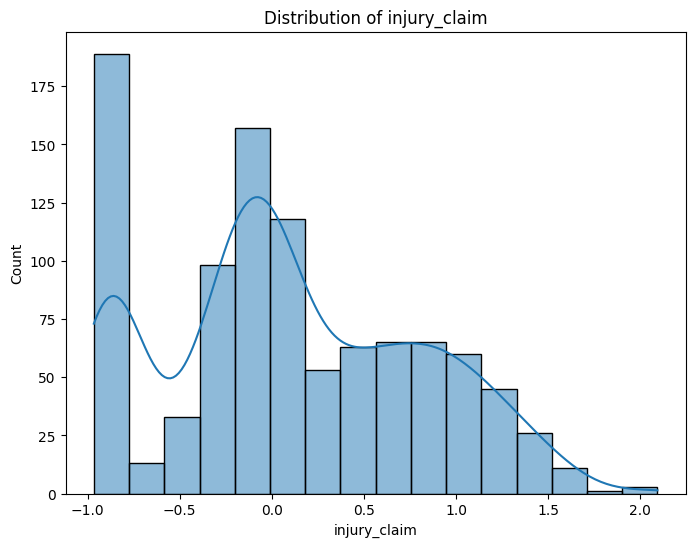

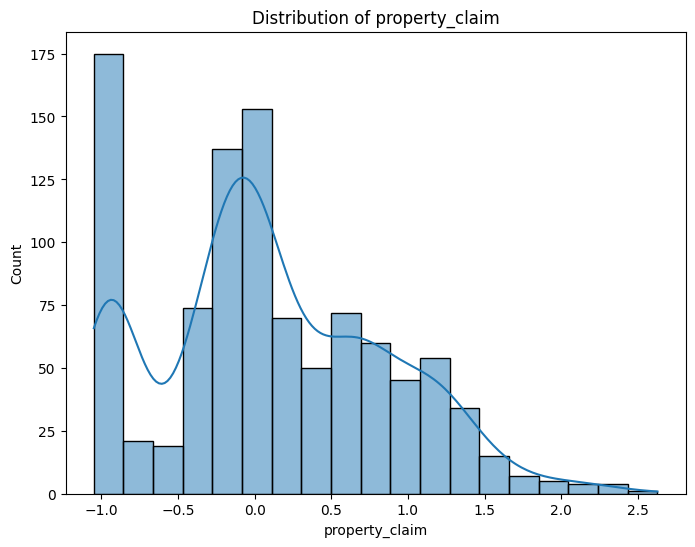

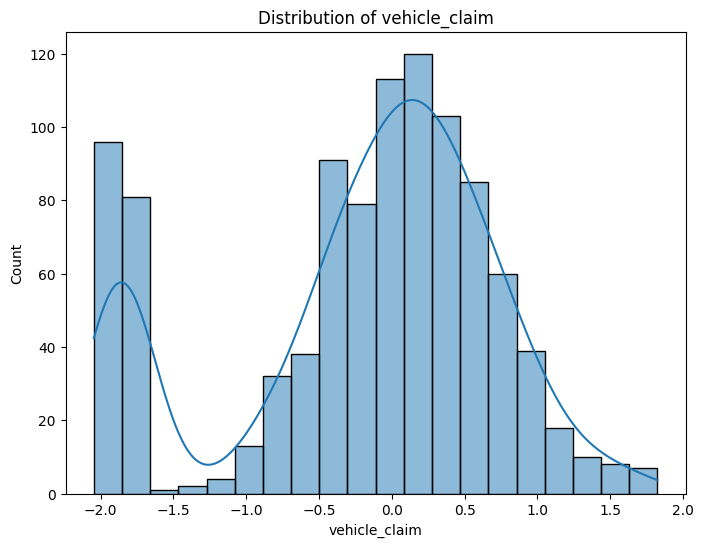

In [ ]:
# Analyze distributions of numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



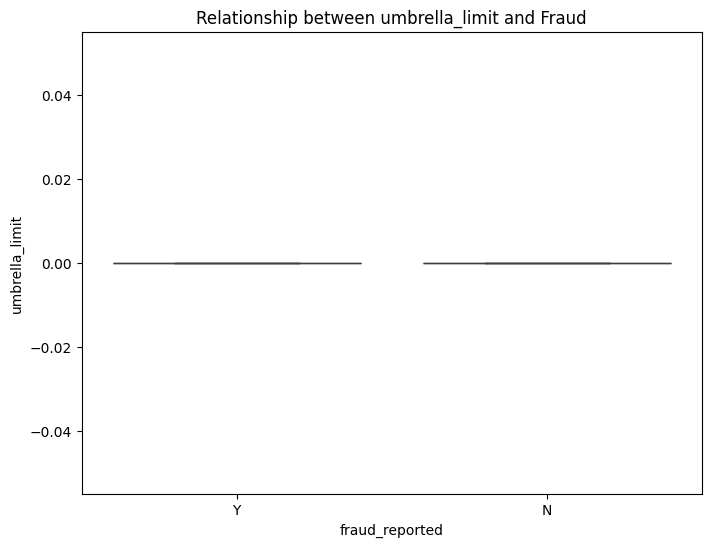

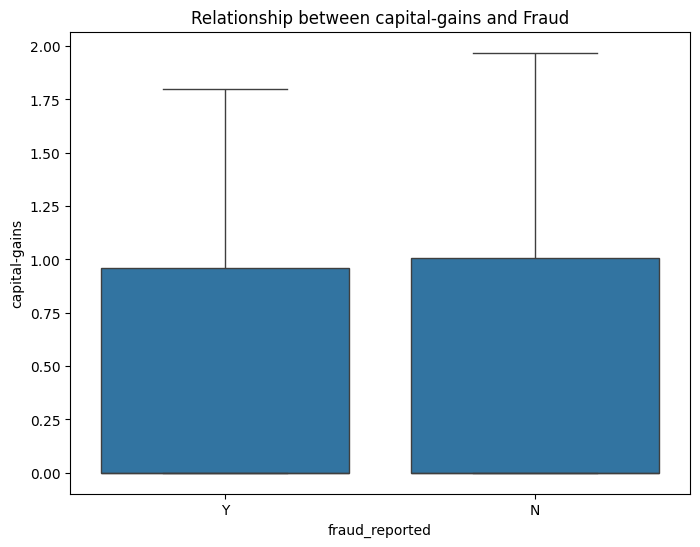

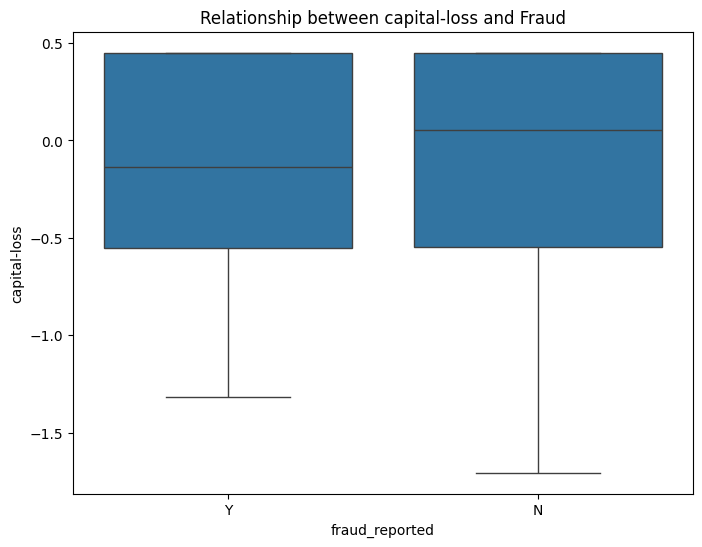

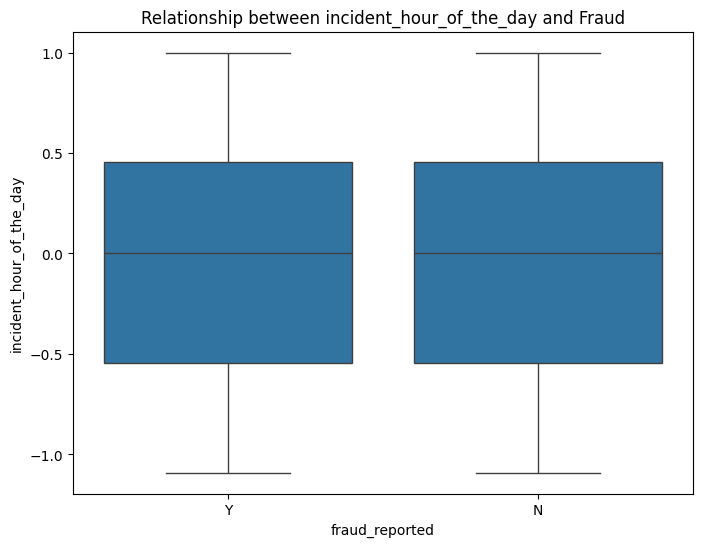

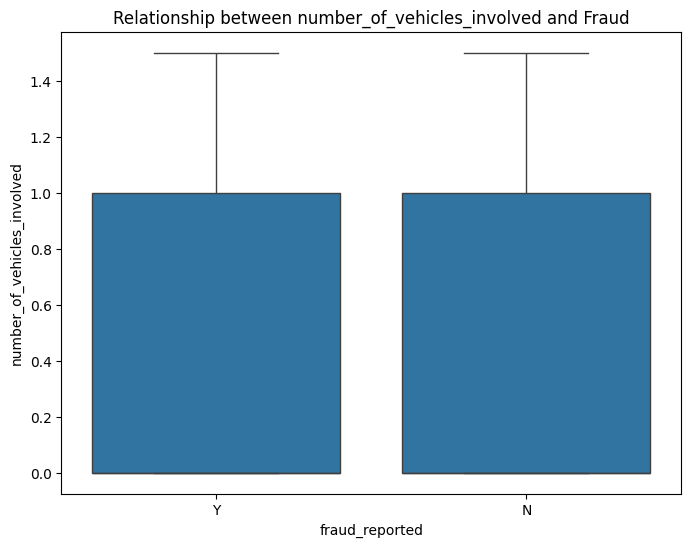

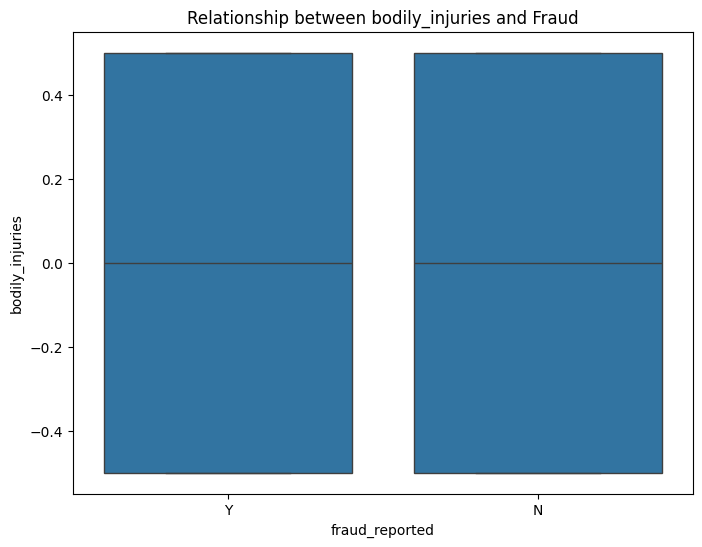

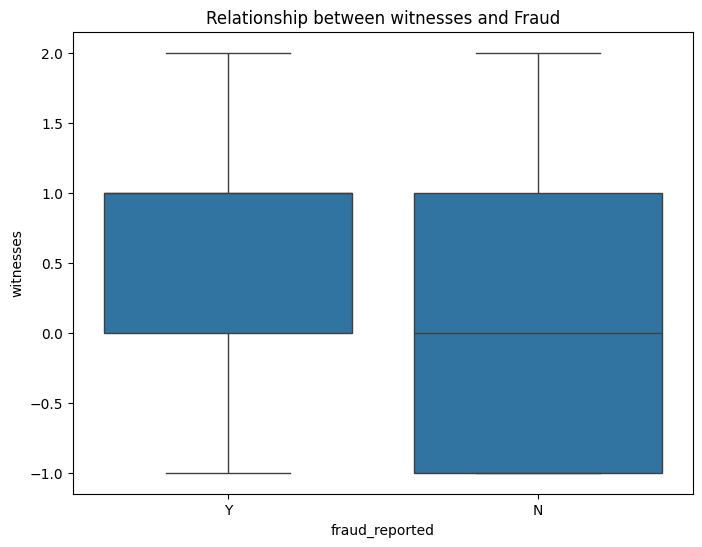

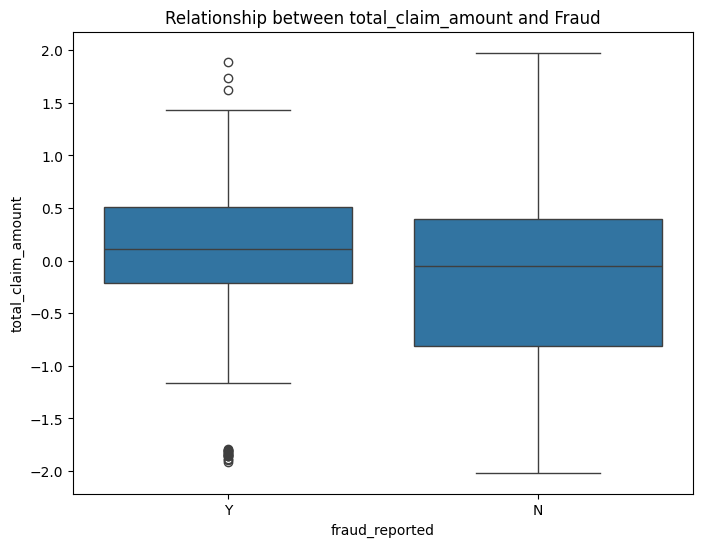

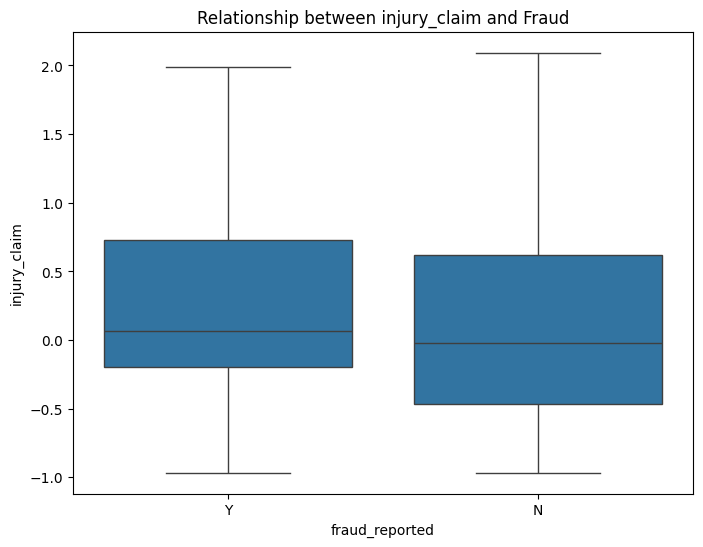

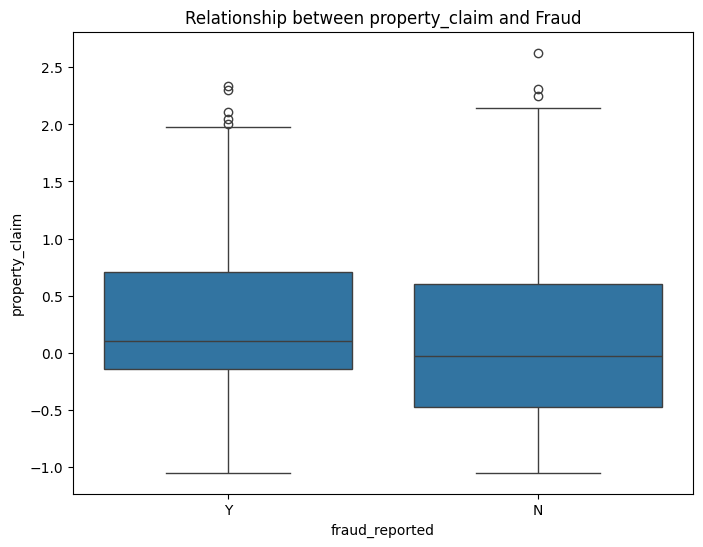

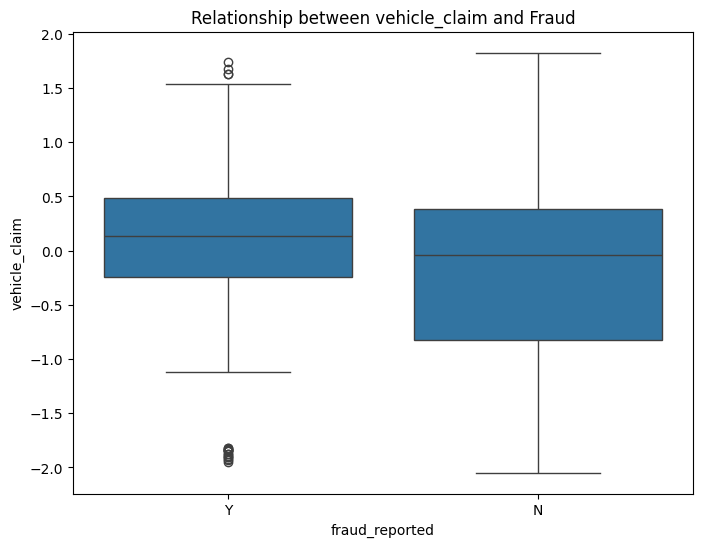

In [ ]:
# Analyze the relationship between numerical features and fraud
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='fraud_reported', y=col, data=df)
    plt.title(f'Relationship between {col} and Fraud')
    plt.show()

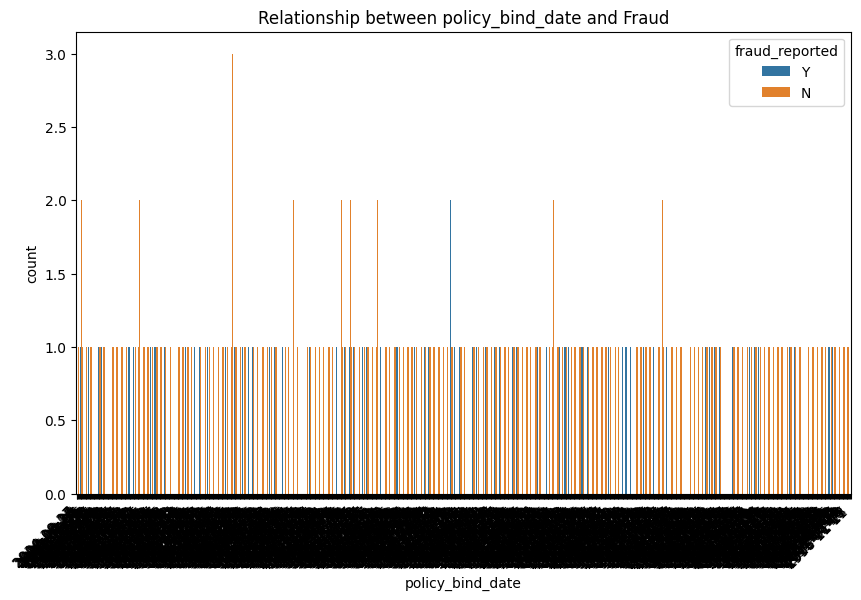

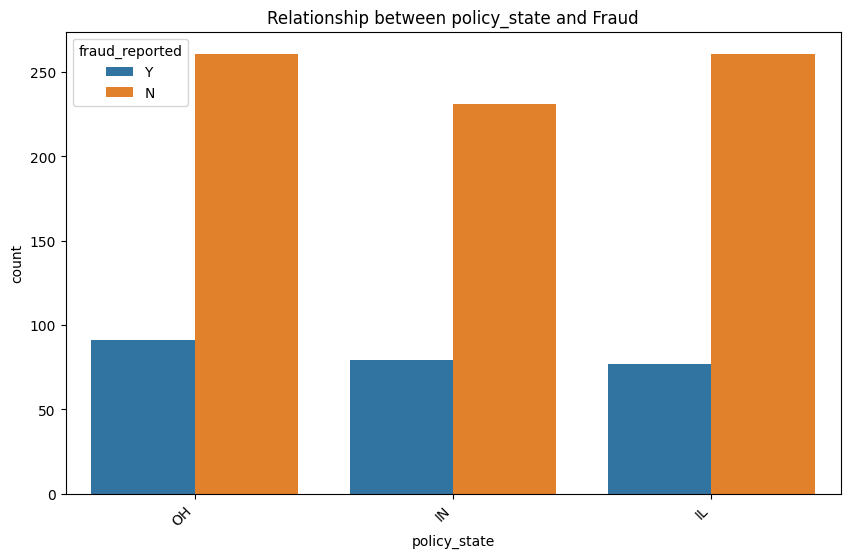

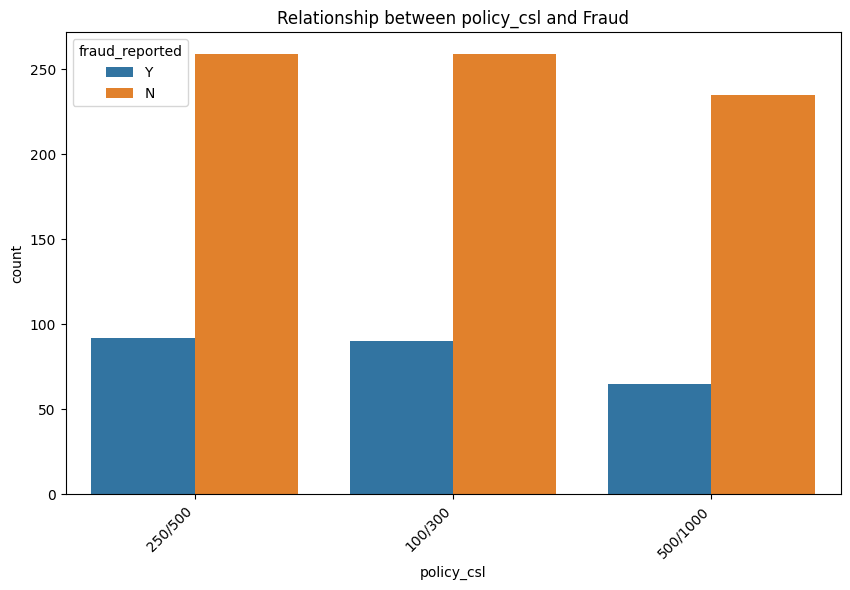

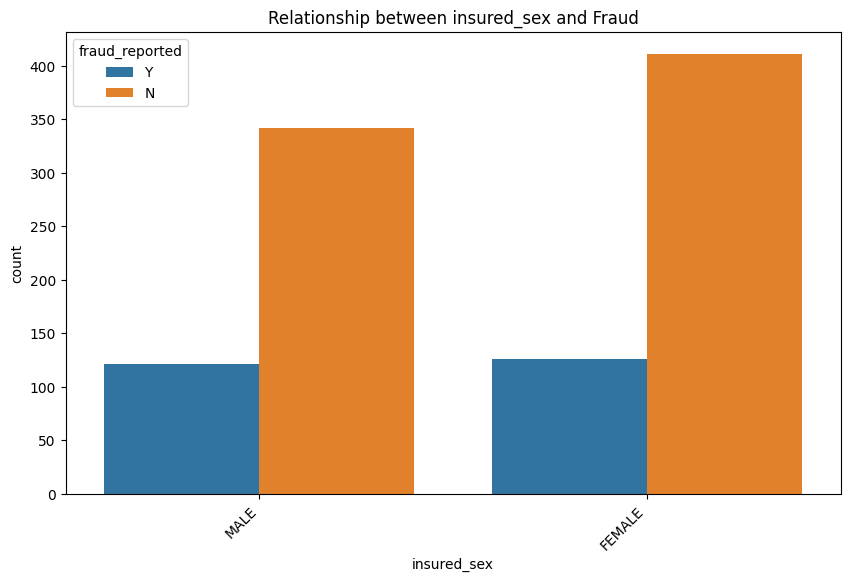

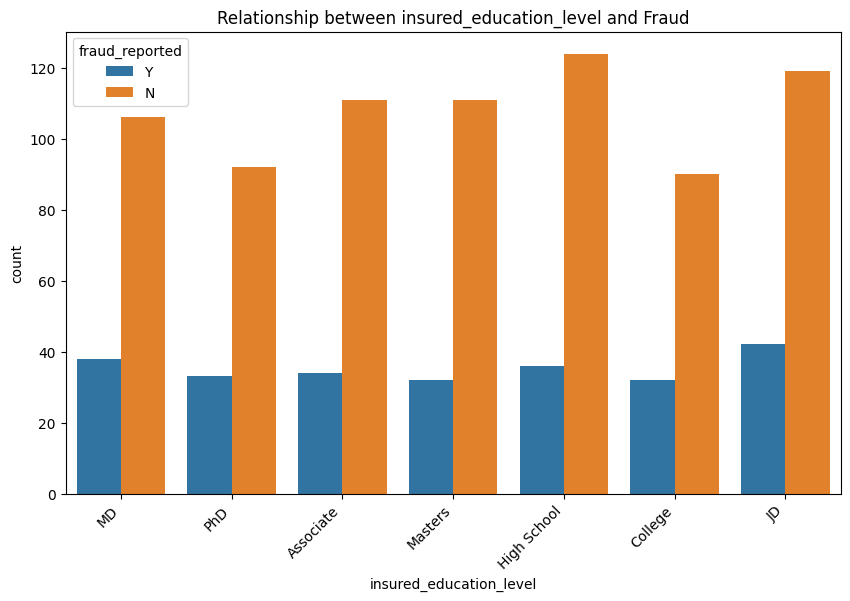

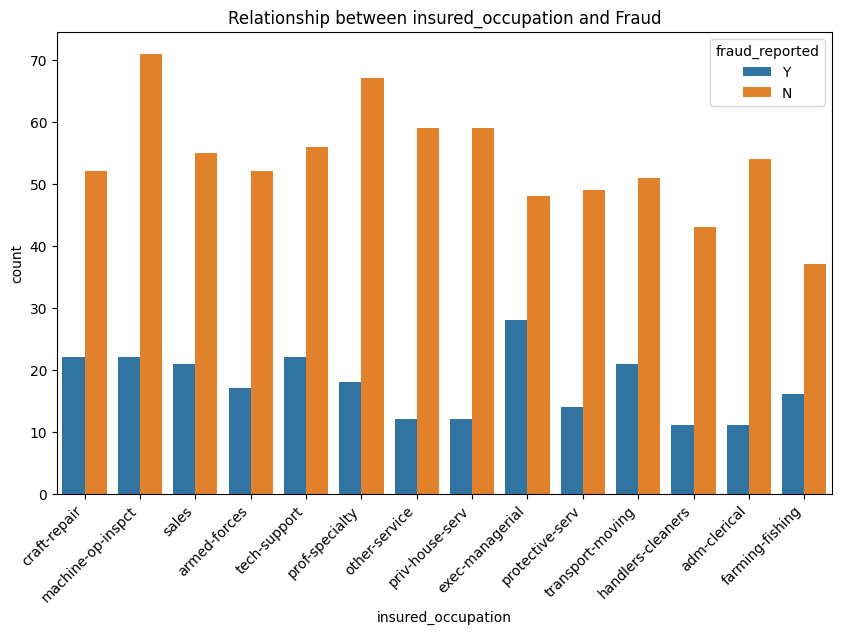

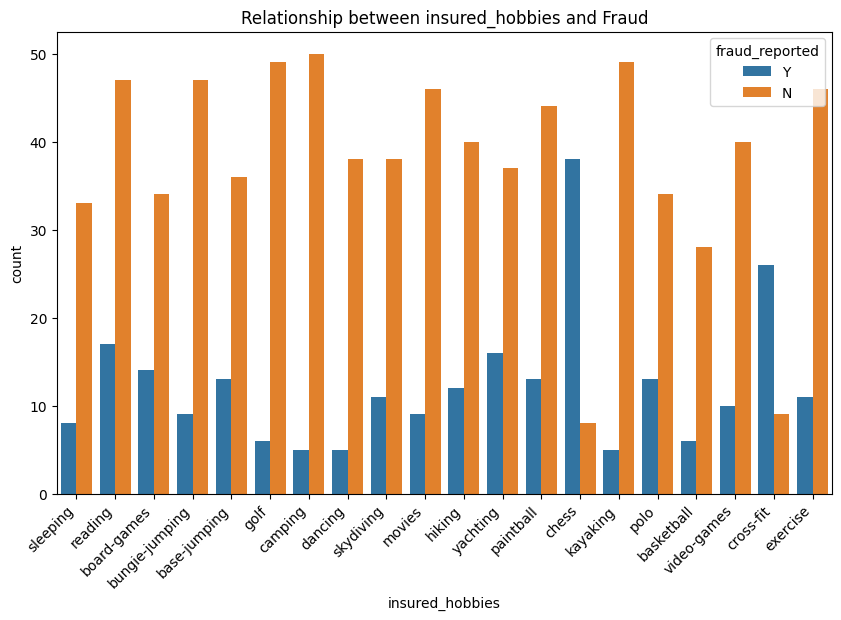

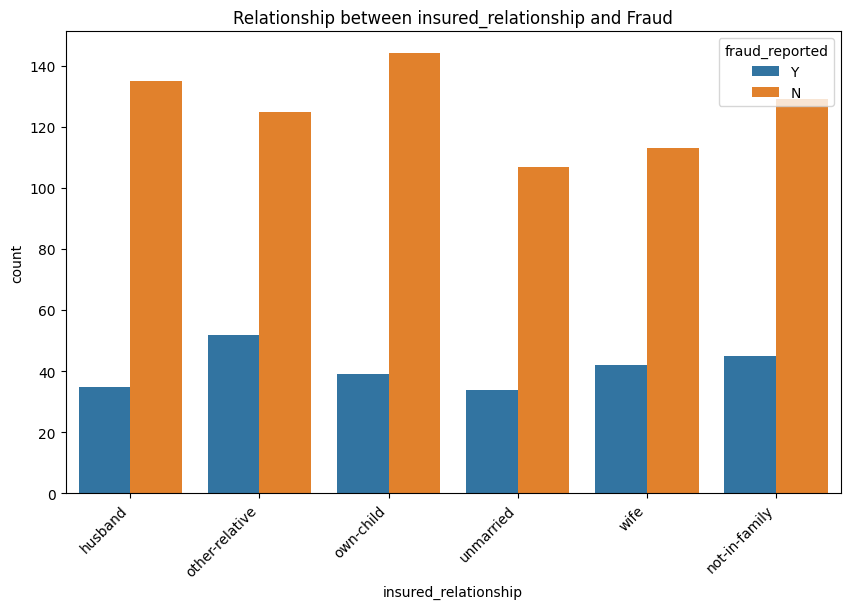

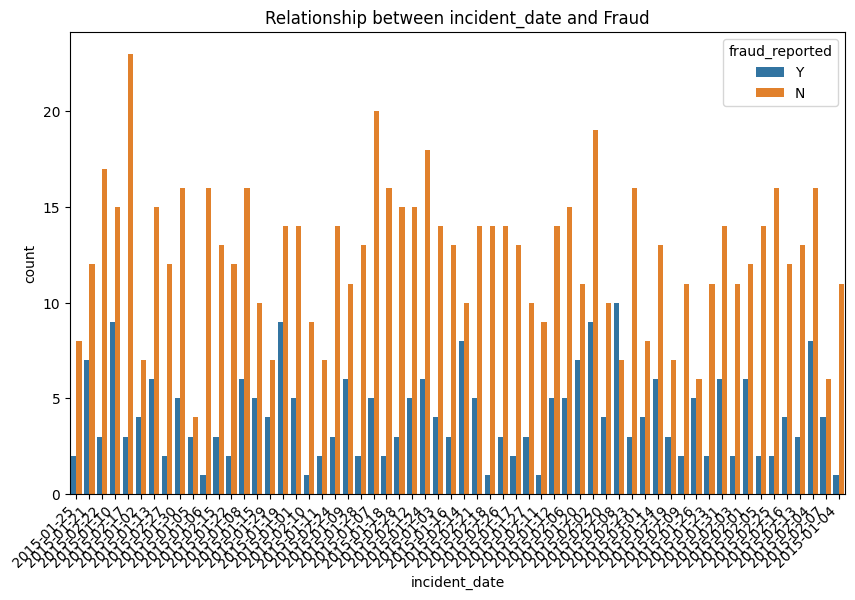

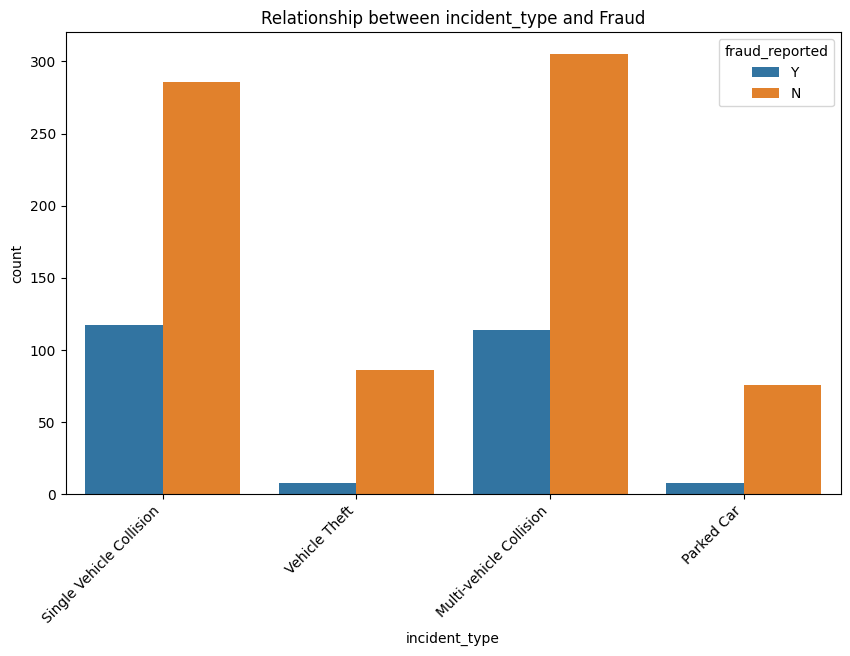

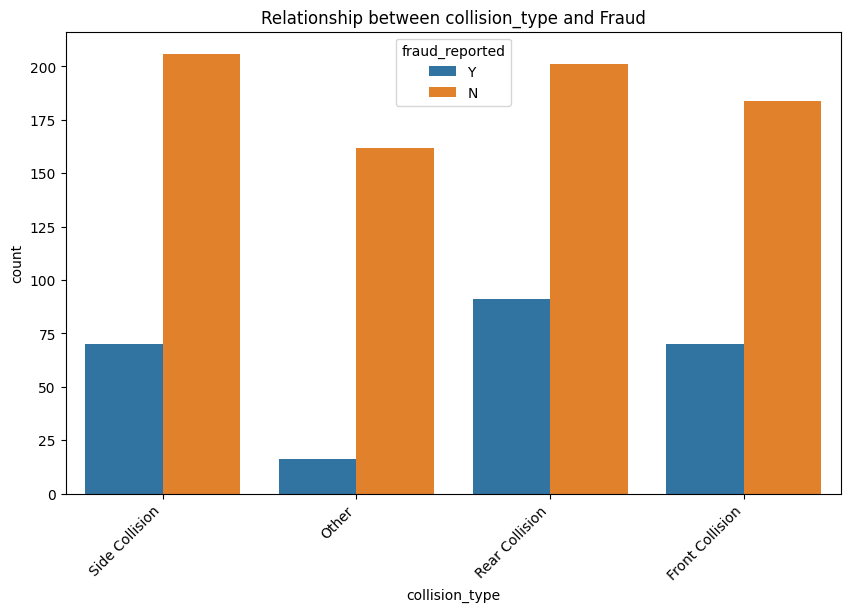

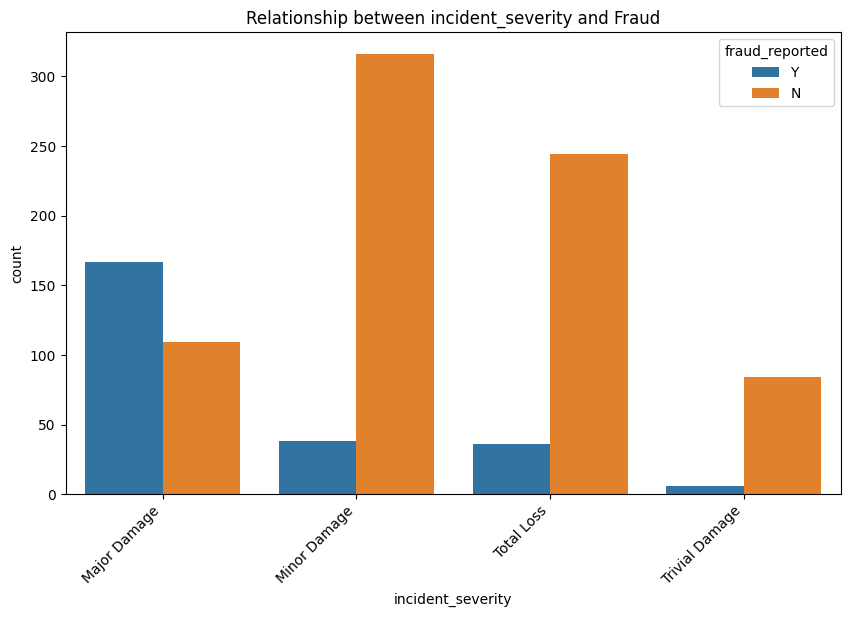

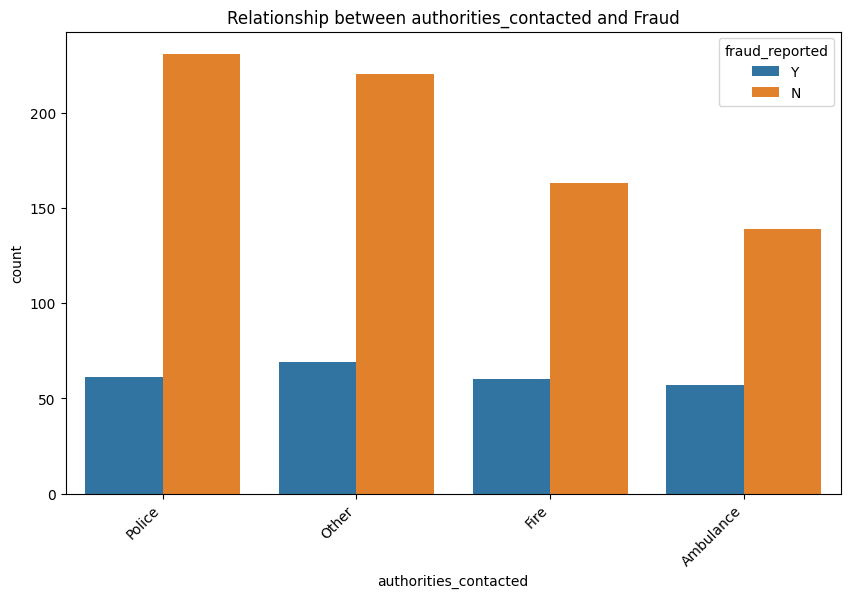

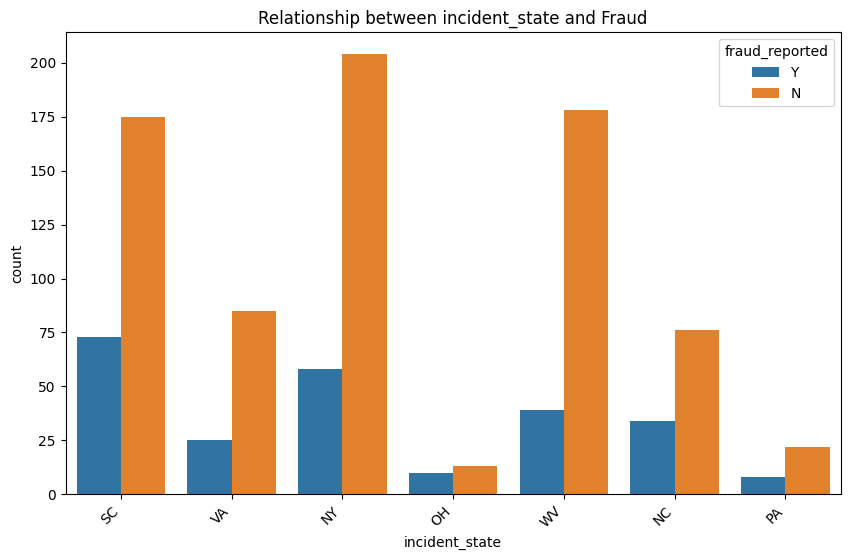

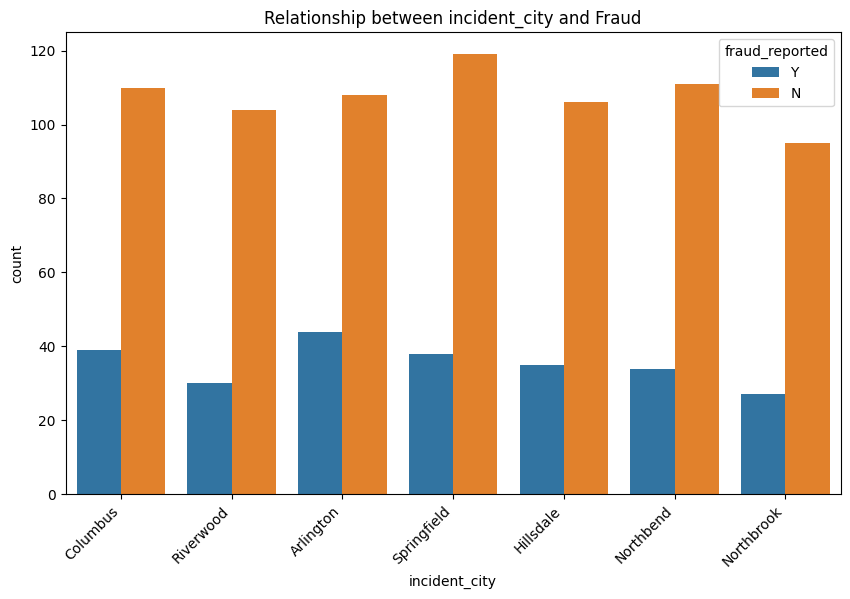

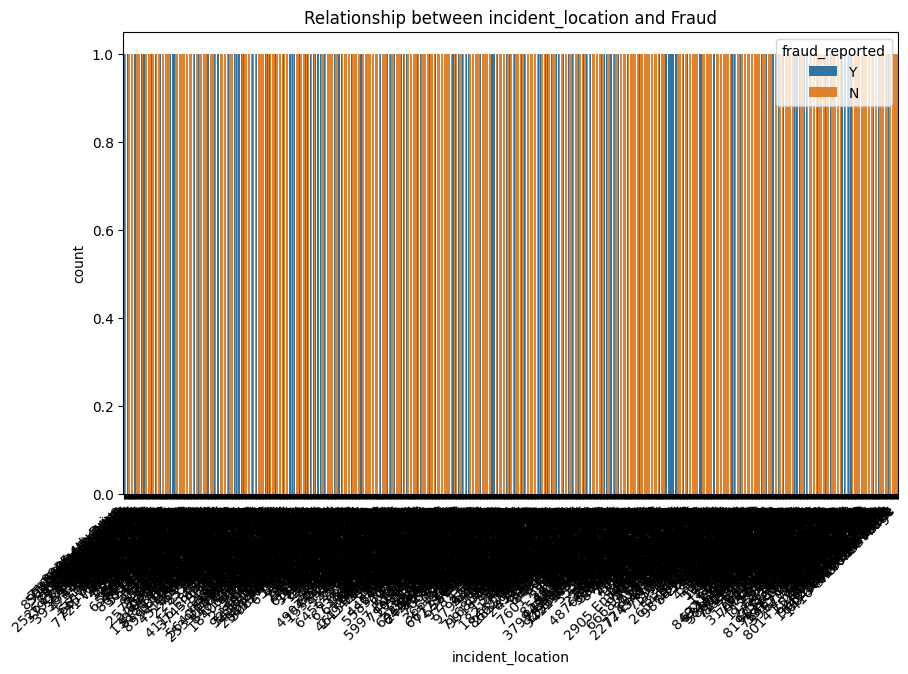

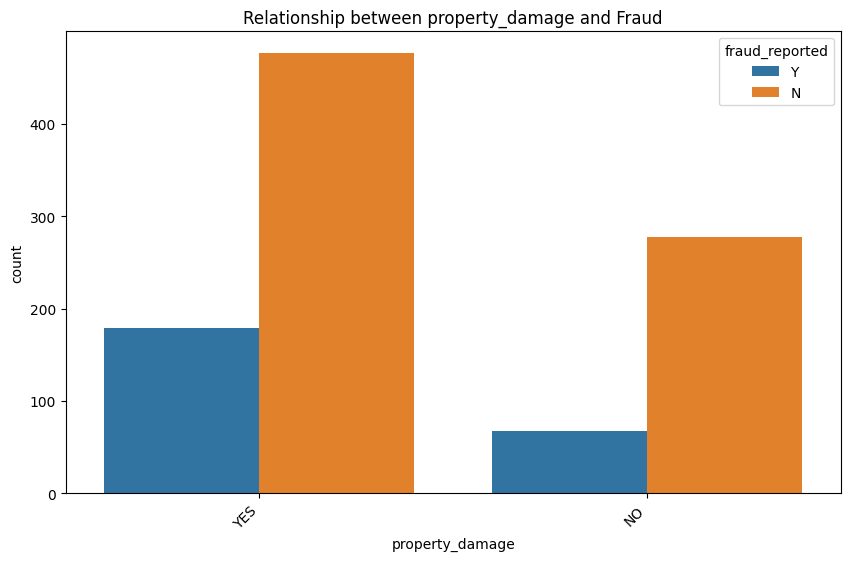

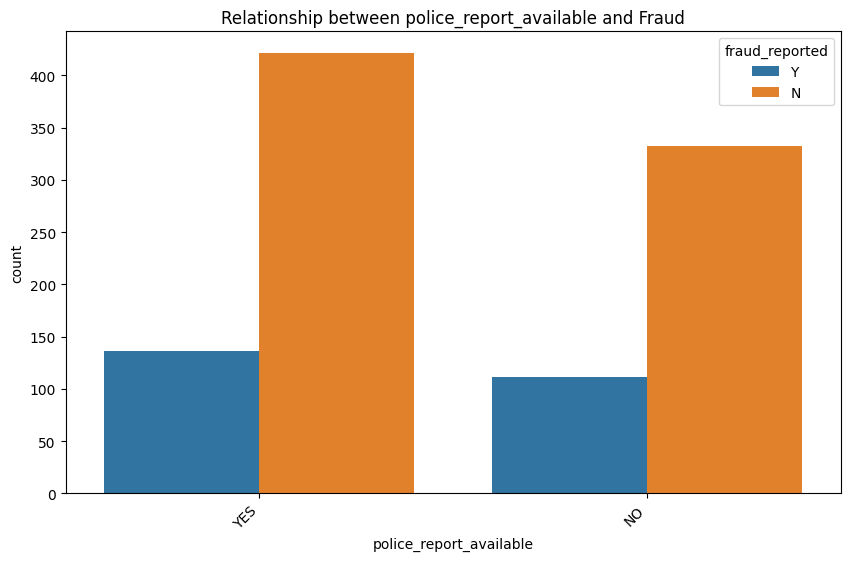

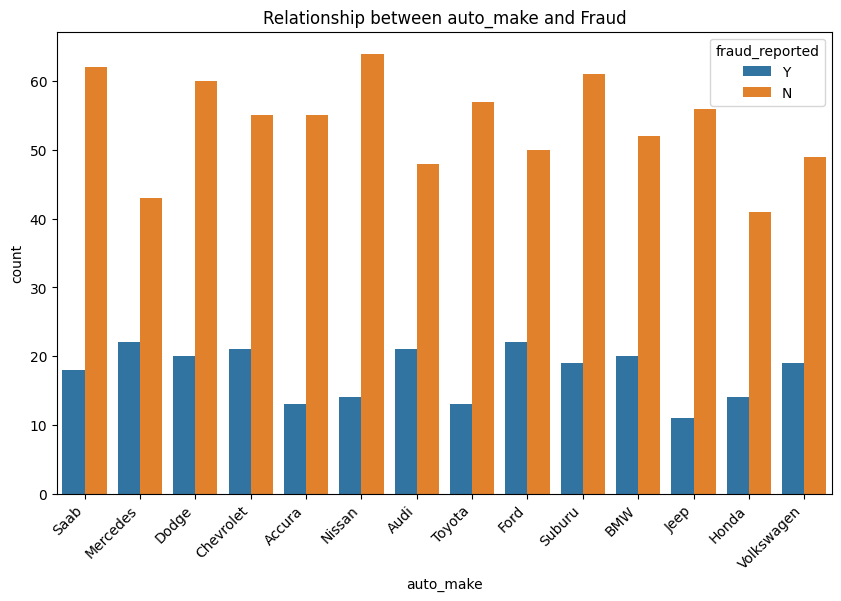

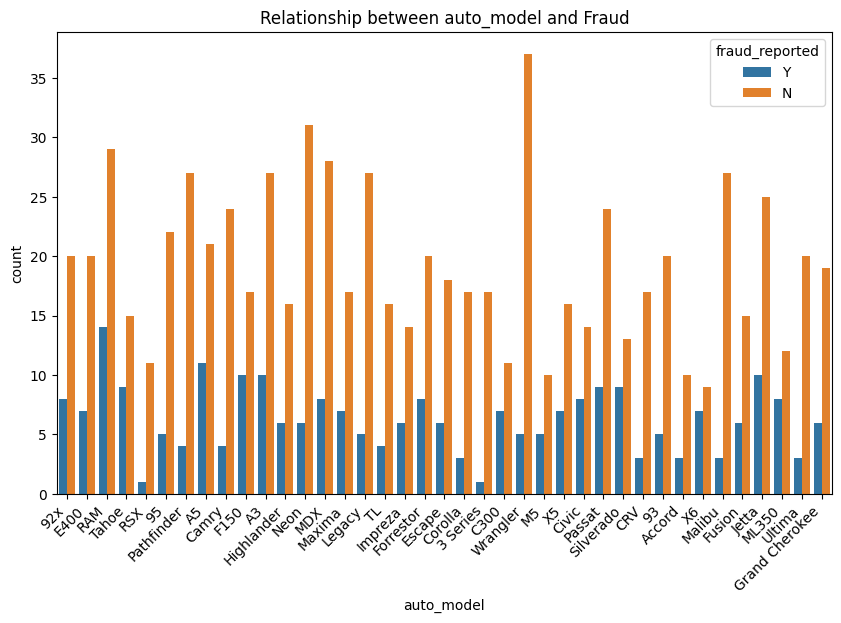

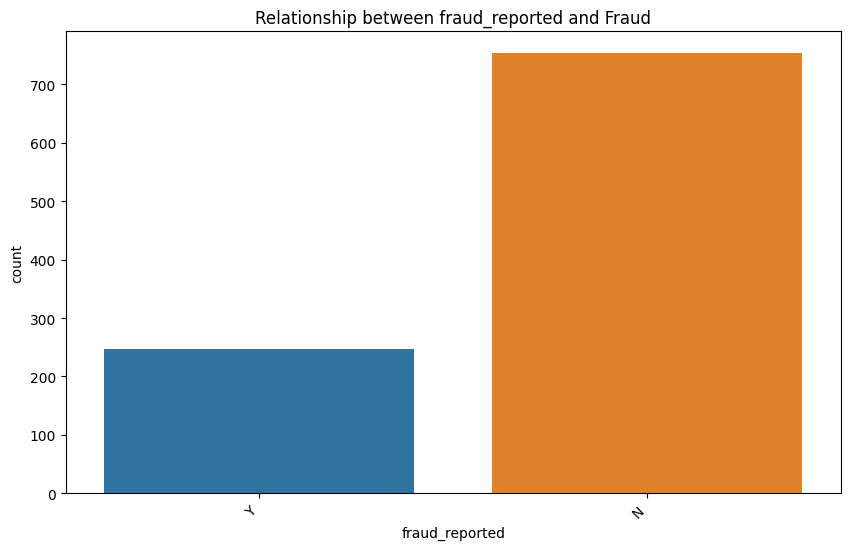

In [ ]:
# Analyze the relationship between categorical features and fraud
categorical_features = df.select_dtypes(include='object').columns
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f'Relationship between {col} and Fraud')
    plt.xticks(rotation=45, ha='right')
    plt.show()

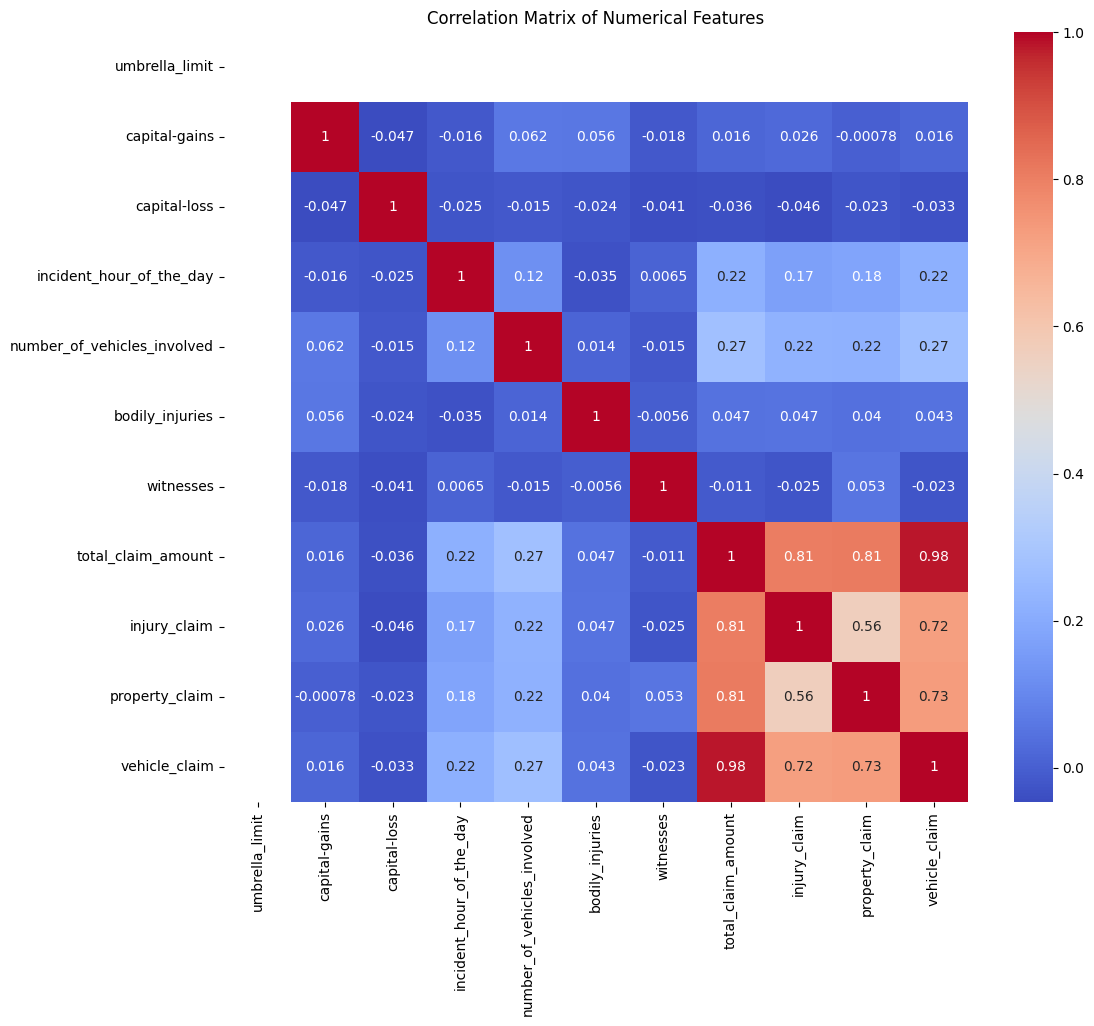

In [ ]:
# Analyze correlations between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Feature Engineering & Selection:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Assuming 'fraud_reported' is your target variable
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=rf_classifier, step=1, cv=5, scoring='accuracy')

# Fit RFECV to the training data
rfecv.fit(X_train, y_train)

# Get the optimal number of features
optimal_feature_count = rfecv.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features:")
selected_features


Optimal number of features: 16
Selected features:


Index(['months_as_customer', 'age', 'policy_number', 'policy_annual_premium',
       'insured_zip', 'capital-loss', 'incident_hour_of_the_day',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'incident_severity_Minor Damage', 'incident_severity_Total Loss'],
      dtype='object')

In [ ]:
X_new = X[selected_features]


Modeling:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 16)
y_train shape: (800,)
X_test shape: (200, 16)
y_test shape: (200,)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)


X_train_resampled shape: (1216, 16)
y_train_resampled shape: (1216,)


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the models
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=42)

# Fit the models on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)
knn_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training set
svm_train_preds = svm_model.predict(X_train_resampled)
knn_train_preds = knn_model.predict(X_train_resampled)
rf_train_preds = rf_model.predict(X_train_resampled)

# Evaluate the models on the training set
print("SVM Training Set Performance:")
print(classification_report(y_train_resampled, svm_train_preds))

print("KNN Training Set Performance:")
print(classification_report(y_train_resampled, knn_train_preds))

print("Random Forest Training Set Performance:")
print(classification_report(y_train_resampled, rf_train_preds))


SVM Training Set Performance:
              precision    recall  f1-score   support

           N       0.55      0.42      0.47       608
           Y       0.53      0.65      0.58       608

    accuracy                           0.54      1216
   macro avg       0.54      0.54      0.53      1216
weighted avg       0.54      0.54      0.53      1216

KNN Training Set Performance:
              precision    recall  f1-score   support

           N       0.84      0.73      0.78       608
           Y       0.76      0.87      0.81       608

    accuracy                           0.80      1216
   macro avg       0.80      0.80      0.80      1216
weighted avg       0.80      0.80      0.80      1216

Random Forest Training Set Performance:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       608
           Y       1.00      1.00      1.00       608

    accuracy                           1.00      1216
   macro avg       1.00     

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


# Calculate accuracy and F1-score for each model on the training set
svm_train_accuracy = accuracy_score(y_train_resampled, svm_train_preds)
svm_train_f1 = f1_score(y_train_resampled, svm_train_preds, average='weighted')  # Use 'weighted' for multi-class

knn_train_accuracy = accuracy_score(y_train_resampled, knn_train_preds)
knn_train_f1 = f1_score(y_train_resampled, knn_train_preds, average='weighted')

rf_train_accuracy = accuracy_score(y_train_resampled, rf_train_preds)
rf_train_f1 = f1_score(y_train_resampled, rf_train_preds, average='weighted')

# Print the results
print(f"SVM Training Accuracy: {svm_train_accuracy:.2%}")
print(f"SVM Training F1-Score: {svm_train_f1:.4f}")

print(f"KNN Training Accuracy: {knn_train_accuracy:.2%}")
print(f"KNN Training F1-Score: {knn_train_f1:.4f}")

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2%}")
print(f"Random Forest Training F1-Score: {rf_train_f1:.4f}")


SVM Training Accuracy: 53.54%
SVM Training F1-Score: 0.5287
KNN Training Accuracy: 79.85%
KNN Training F1-Score: 0.7976
Random Forest Training Accuracy: 100.00%
Random Forest Training F1-Score: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming your models are already trained (svm_model, knn_model, rf_model)

# Calculate cross-validated accuracy for each model
svm_cv_scores = cross_val_score(svm_model, X_test, y_test, cv=5, scoring='accuracy')
knn_cv_scores = cross_val_score(knn_model, X_test, y_test, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_test, y_test, cv=5, scoring='accuracy')

# Print the cross-validated accuracy scores
print("SVM Cross-Validated Accuracy Scores:", svm_cv_scores)
print("KNN Cross-Validated Accuracy Scores:", knn_cv_scores)
print("Random Forest Cross-Validated Accuracy Scores:", rf_cv_scores)

# Calculate and print the mean accuracy for each model
print(f"SVM Mean Accuracy: {svm_cv_scores.mean():.2%}")
print(f"KNN Mean Accuracy: {knn_cv_scores.mean():.2%}")
print(f"Random Forest Mean Accuracy: {rf_cv_scores.mean():.2%}")


SVM Cross-Validated Accuracy Scores: [0.725 0.725 0.725 0.725 0.725]
KNN Cross-Validated Accuracy Scores: [0.625 0.65  0.65  0.75  0.725]
Random Forest Cross-Validated Accuracy Scores: [0.725 0.775 0.75  0.875 0.8  ]
SVM Mean Accuracy: 72.50%
KNN Mean Accuracy: 68.00%
Random Forest Mean Accuracy: 78.50%


In [ ]:
# Calculate cross-validated F1-score for each model
svm_cv_f1 = cross_val_score(svm_model, X_test, y_test, cv=5, scoring='f1_weighted')
knn_cv_f1 = cross_val_score(knn_model, X_test, y_test, cv=5, scoring='f1_weighted')
rf_cv_f1 = cross_val_score(rf_model, X_test, y_test, cv=5, scoring='f1_weighted')

# Print the cross-validated F1-scores
print("SVM Cross-Validated F1-Scores:", svm_cv_f1)
print("KNN Cross-Validated F1-Scores:", knn_cv_f1)
print("Random Forest Cross-Validated F1-Scores:", rf_cv_f1)

# Calculate and print the mean F1-score for each model
print(f"SVM Mean F1-Score: {svm_cv_f1.mean():.4f}")
print(f"KNN Mean F1-Score: {knn_cv_f1.mean():.4f}")
print(f"Random Forest Mean F1-Score: {rf_cv_f1.mean():.4f}")


SVM Cross-Validated F1-Scores: [0.60942029 0.60942029 0.60942029 0.60942029 0.60942029]
KNN Cross-Validated F1-Scores: [0.55769231 0.57121212 0.60078125 0.69372294 0.67564103]
Random Forest Cross-Validated F1-Scores: [0.67564103 0.71222732 0.66421569 0.87308313 0.75497835]
SVM Mean F1-Score: 0.6094
KNN Mean F1-Score: 0.6198
Random Forest Mean F1-Score: 0.7360


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Score: {best_score}")

# Train a model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on the test set
best_rf_test_preds = best_rf_model.predict(X_test)
best_rf_test_accuracy = accuracy_score(y_test, best_rf_test_preds)
best_rf_test_f1 = f1_score(y_test, best_rf_test_preds, average='weighted')

print(f"Best Random Forest Testing Accuracy: {best_rf_test_accuracy:.2%}")
print(f"Best Random Forest Testing F1-Score: {best_rf_test_f1:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8873574849895431
Best Random Forest Testing Accuracy: 81.50%
Best Random Forest Testing F1-Score: 0.8134


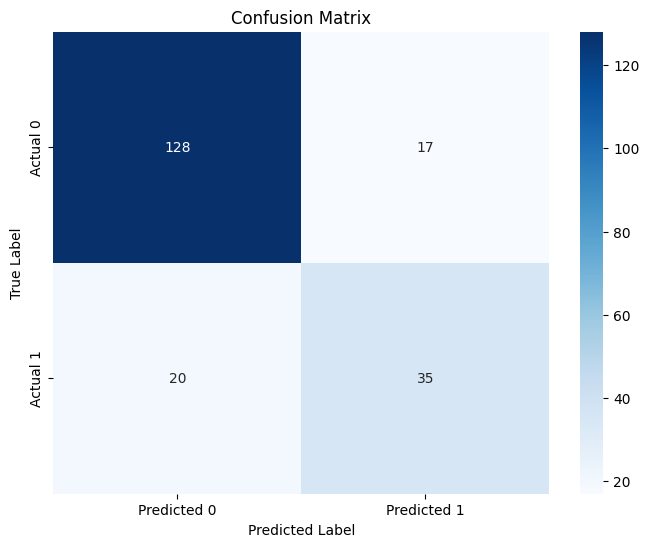

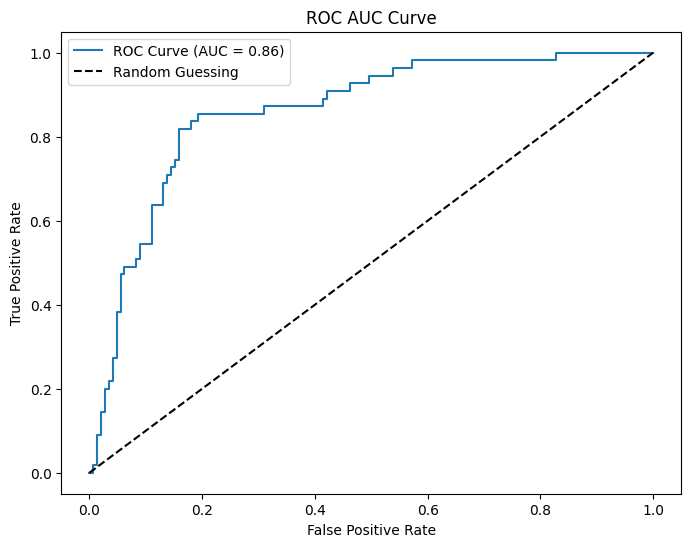

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
cm = confusion_matrix(y_test, best_rf_test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ROC AUC Curve
try:
    y_prob = best_rf_model.predict_proba(X_test)[:, 1]
    # Convert y_test to numerical values (0 and 1)
    y_test_numeric = y_test.map({'N': 0, 'Y': 1})
    roc_auc = roc_auc_score(y_test_numeric, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend()
    plt.show()
except AttributeError:
    print("The model doesn't have a predict_proba method. Cannot compute ROC AUC.")